In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

from dmba import classificationSummary

no display found. Using non-interactive Agg backend


In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import f1_score, classification_report

In [3]:
%matplotlib inline

In [4]:
# load data and look at first 5 rows

auctions = pd.read_csv('Hotel Reservations.csv')
auctions.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [5]:
auctions.shape

(36275, 19)

In [6]:
auctions.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [7]:
auctions.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

In [8]:
auctions['type_of_meal_plan'].unique()

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

In [9]:
auctions['no_of_adults'].unique()

array([2, 1, 3, 0, 4])

In [10]:
auctions['no_of_children'].unique()

array([ 0,  2,  1,  3, 10,  9])

In [11]:
auctions['room_type_reserved'].unique()

array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

In [12]:
auctions['market_segment_type'].unique()

array(['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary'],
      dtype=object)

In [13]:
auctions['repeated_guest'].unique()

array([0, 1])

In [14]:
auctions['booking_status'].unique()

array(['Not_Canceled', 'Canceled'], dtype=object)

In [15]:
   
auctions['avg_price_per_room'].unique()

array([ 65.  , 106.68,  60.  , ..., 118.43, 137.25, 167.8 ])

In [16]:
auctions['avg_price_per_room'].nunique()

3930

In [18]:
auctions.groupby('Booking_ID').agg(sum_alias_1=('Booking_ID', 'count')).sort_values(by=['sum_alias_1'], ascending=True)



,sum_alias_1
Booking_ID,
INN00001,1
INN24193,1
INN24192,1
INN24191,1
INN24190,1
...,...
INN12093,1
INN12094,1
INN12095,1


In [19]:
auctions2 = auctions.drop(["Booking_ID"], axis = 1)

In [20]:
auctions2.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [21]:
#date out of range, ignore
auctions3 = auctions2.loc[(auctions2['arrival_year'] != 2018) & (auctions2['arrival_month'] != 2) & (auctions2['arrival_date'] != 29)]





In [22]:
#ignore
auctions3['arrival_date1'] = auctions3['arrival_year'].astype(str) + '-' + auctions3['arrival_month'].astype(str) + '-' + auctions3['arrival_date'].astype(str)
# auctions2['arrival_date1'] = auctions2[['arrival_year', 'arrival_month', 'arrival_date']].agg('-'.join, axis=1)
# print(auctions2['arrival_date1'])
pd.to_datetime(auctions3['arrival_date1'])



/var/folders/ck/1n_7jyp95jjdgl65pxpd4f540000gn/T/ipykernel_88249/54671095.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auctions3['arrival_date1'] = auctions3['arrival_year'].astype(str) + '-' + auctions3['arrival_month'].astype(str) + '-' + auctions3['arrival_date'].astype(str)


0       2017-10-02
6       2017-10-15
14      2017-10-20
16      2017-10-05
17      2017-08-10
           ...    
36229   2017-11-25
36235   2017-09-21
36242   2017-09-24
36250   2017-12-10
36259   2017-09-09
Name: arrival_date1, Length: 6270, dtype: datetime64[ns]

In [23]:
auctions3.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,arrival_date1
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled,2017-10-2
6,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled,2017-10-15
14,2,0,0,2,Meal Plan 1,0,Room_Type 1,47,2017,10,20,Online,0,0,0,94.50,2,Not_Canceled,2017-10-20
16,1,0,1,0,Meal Plan 1,0,Room_Type 1,0,2017,10,5,Offline,0,0,0,96.00,0,Not_Canceled,2017-10-5
17,2,0,1,3,Not Selected,0,Room_Type 1,1,2017,8,10,Online,0,0,0,96.00,1,Not_Canceled,2017-8-10


In [24]:
auctions3 = auctions3.reset_index(drop=True)

In [25]:
auctions3.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,arrival_date1
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled,2017-10-2
1,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled,2017-10-15
2,2,0,0,2,Meal Plan 1,0,Room_Type 1,47,2017,10,20,Online,0,0,0,94.50,2,Not_Canceled,2017-10-20
3,1,0,1,0,Meal Plan 1,0,Room_Type 1,0,2017,10,5,Offline,0,0,0,96.00,0,Not_Canceled,2017-10-5
4,2,0,1,3,Not Selected,0,Room_Type 1,1,2017,8,10,Online,0,0,0,96.00,1,Not_Canceled,2017-8-10


In [26]:
from sklearn import preprocessing

In [27]:
predictors_df = auctions3[['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights','type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 
              'lead_time','arrival_year','arrival_month','arrival_date','market_segment_type','repeated_guest','no_of_previous_cancellations','no_of_previous_bookings_not_canceled','avg_price_per_room','no_of_special_requests']]
response_df = auctions3['booking_status']



In [28]:
predictors_df.corr()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
no_of_adults,1.000000,0.024018,0.150856,0.104229,0.043138,0.067541,NaN,-0.058286,0.063453,-0.153720,-0.065562,-0.128521,0.236147,0.155695
no_of_children,0.024018,1.000000,0.025170,0.013237,0.040427,-0.097323,NaN,-0.018880,0.025411,-0.028468,-0.024281,-0.015272,0.209073,0.155872
no_of_weekend_nights,0.150856,0.025170,1.000000,0.127187,-0.005547,0.051671,NaN,-0.015144,0.014745,-0.038093,-0.022121,-0.032606,-0.031384,0.085070
no_of_week_nights,0.104229,0.013237,0.127187,1.000000,-0.029378,0.034319,NaN,-0.013297,0.024102,-0.063084,-0.007356,-0.056318,0.050001,0.131270
required_car_parking_space,0.043138,0.040427,-0.005547,-0.029378,1.000000,-0.075219,NaN,0.058874,0.009104,-0.024176,-0.021668,-0.013944,0.085434,0.086906
lead_time,0.067541,-0.097323,0.051671,0.034319,-0.075219,1.000000,NaN,-0.177803,-0.110613,-0.137101,-0.092876,-0.078644,-0.101085,-0.192251
arrival_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arrival_month,-0.058286,-0.018880,-0.015144,-0.013297,0.058874,-0.177803,NaN,1.000000,0.048227,0.098925,0.061927,0.085924,-0.196002,-0.000541
arrival_date,0.063453,0.025411,0.014745,0.024102,0.009104,-0.110613,NaN,0.048227,1.000000,-0.017488,-0.030780,0.011128,0.084840,0.036251
repeated_guest,-0.153720,-0.028468,-0.038093,-0.063084,-0.024176,-0.137101,NaN,0.098925,-0.017488,1.000000,0.725975,0.527419,-0.133101,-0.074136


<AxesSubplot:>

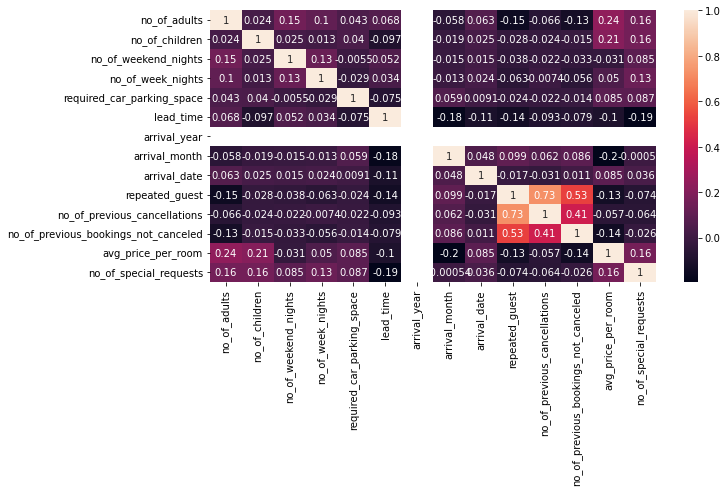

In [29]:
correlation_matrix = predictors_df.corr()

#sns.heatmap(correlation_matrix, annot = True)

plt.figure(figsize = (10,5))
sns.heatmap(correlation_matrix, annot=True)

In [30]:
predictors_df = predictors_df.drop(["arrival_year", "arrival_month","arrival_date"], axis = 1)

<AxesSubplot:>

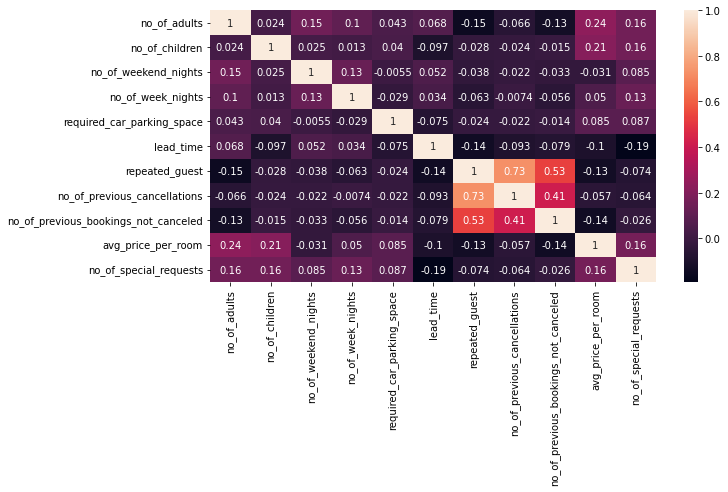

In [31]:
correlation_matrix = predictors_df.corr()

#sns.heatmap(correlation_matrix, annot = True)

plt.figure(figsize = (10,5))
sns.heatmap(correlation_matrix, annot=True)

In [32]:
predictors_df.dtypes

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
dtype: object

In [33]:
# flag categorical varibales
predictors_df = pd.get_dummies(predictors_df, drop_first = True)
predictors_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,...,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,0,0,0,65.00,...,0,0,0,0,0,0,0,0,1,0
1,2,0,1,3,0,34,0,0,0,107.55,...,0,0,0,0,0,0,0,0,0,1
2,2,0,0,2,0,47,0,0,0,94.50,...,0,0,0,0,0,0,0,0,0,1
3,1,0,1,0,0,0,0,0,0,96.00,...,0,0,0,0,0,0,0,0,1,0
4,2,0,1,3,0,1,0,0,0,96.00,...,1,0,0,0,0,0,0,0,0,1


In [34]:
pd.set_option('display.max_columns', None)

In [35]:
z_score_norm = preprocessing.StandardScaler()
predictor_df_normalized = z_score_norm.fit_transform(predictors_df)
predictor_df_normalized = pd.DataFrame(predictor_df_normalized, columns = predictors_df.columns)
predictor_df_normalized.head(10)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,0.520061,-0.18192,0.328974,-0.066885,-0.162341,2.491448,-0.183849,-0.13347,-0.096965,-0.765524,-0.672528,-0.498006,-0.01263,-0.237206,-0.152772,-0.021879,-0.303239,-0.052141,-0.142624,-0.045581,-0.288575,1.118636,-0.917579
1,0.520061,-0.18192,0.328974,0.698391,-0.162341,-0.363029,-0.183849,-0.13347,-0.096965,0.524611,0.582084,-0.498006,-0.01263,-0.237206,-0.152772,-0.021879,-0.303239,-0.052141,-0.142624,-0.045581,-0.288575,-0.893946,1.089825
2,0.520061,-0.18192,-0.840338,-0.066885,-0.162341,-0.167722,-0.183849,-0.13347,-0.096965,0.128929,1.836695,-0.498006,-0.01263,-0.237206,-0.152772,-0.021879,-0.303239,-0.052141,-0.142624,-0.045581,-0.288575,-0.893946,1.089825
3,-1.635115,-0.18192,0.328974,-1.597437,-0.162341,-0.873830,-0.183849,-0.13347,-0.096965,0.174410,-0.672528,-0.498006,-0.01263,-0.237206,-0.152772,-0.021879,-0.303239,-0.052141,-0.142624,-0.045581,-0.288575,1.118636,-0.917579
4,0.520061,-0.18192,0.328974,0.698391,-0.162341,-0.858806,-0.183849,-0.13347,-0.096965,0.174410,0.582084,-0.498006,-0.01263,4.215739,-0.152772,-0.021879,-0.303239,-0.052141,-0.142624,-0.045581,-0.288575,-0.893946,1.089825
5,0.520061,-0.18192,1.498285,-0.066885,-0.162341,0.613503,-0.183849,-0.13347,-0.096965,-0.765524,-0.672528,-0.498006,-0.01263,-0.237206,-0.152772,-0.021879,-0.303239,-0.052141,-0.142624,-0.045581,-0.288575,-0.893946,1.089825
6,0.520061,-0.18192,0.328974,-1.597437,-0.162341,-0.693547,-0.183849,-0.13347,-0.096965,-0.553281,-0.672528,-0.498006,-0.01263,-0.237206,-0.152772,-0.021879,-0.303239,-0.052141,-0.142624,-0.045581,-0.288575,1.118636,-0.917579
7,0.520061,-0.18192,1.498285,-0.066885,-0.162341,0.613503,-0.183849,-0.13347,-0.096965,-0.765524,-0.672528,-0.498006,-0.01263,-0.237206,-0.152772,-0.021879,-0.303239,-0.052141,-0.142624,-0.045581,-0.288575,-0.893946,1.089825
8,0.520061,-0.18192,0.328974,-0.832161,-0.162341,0.027584,-0.183849,-0.13347,-0.096965,-0.765524,-0.672528,-0.498006,-0.01263,-0.237206,-0.152772,-0.021879,-0.303239,-0.052141,-0.142624,-0.045581,-0.288575,1.118636,-0.917579
9,-1.635115,-0.18192,0.328974,-0.066885,-0.162341,-0.317958,-0.183849,-0.13347,-0.096965,-1.604491,-0.672528,-0.498006,-0.01263,-0.237206,-0.152772,-0.021879,-0.303239,-0.052141,-0.142624,-0.045581,-0.288575,-0.893946,1.089825


In [36]:

response_df = response_df.map({'Not_Canceled': 0, 'Canceled': 1})


In [37]:
response_df.head()

0    0
1    0
2    0
3    0
4    0
Name: booking_status, dtype: int64

In [38]:
# partition data into train and test sets

X_classifier = predictor_df_normalized
y_classifier = response_df
train_X_classifier, test_X_classifier, train_y_classifier, test_y_classifier = train_test_split(X_classifier, 
                                                            y_classifier, test_size=0.3, random_state=616)

In [39]:
# training the k-NN model and printing the F1 score

knn = KNeighborsClassifier(n_neighbors=5).fit(train_X_classifier, train_y_classifier)
predicted_y_training = knn.predict(train_X_classifier)
f1_score(train_y_classifier, predicted_y_training)

0.7314578005115091

In [40]:
# performance of k-NN on test data

predicted_y_test = knn.predict(test_X_classifier)
f1_score(test_y_classifier, predicted_y_test)

0.7388059701492536

In [41]:
# training a classifier for different values of k

results = []
for k in range(1, 20):
    knn2 = KNeighborsClassifier(n_neighbors=k).fit(train_X_classifier, train_y_classifier)
    results.append({
        'k': k,
        'f1_score': f1_score(test_y_classifier, knn2.predict(test_X_classifier))
    })

# Convert results to a pandas data frame
results = pd.DataFrame(results)
print(results)

     k  f1_score
0    1  0.706294
1    2  0.691511
2    3  0.725926
3    4  0.725490
4    5  0.738806
5    6  0.678937
6    7  0.720000
7    8  0.656904
8    9  0.685259
9   10  0.626866
10  11  0.672065
11  12  0.642706
12  13  0.649194
13  14  0.639004
14  15  0.647887
15  16  0.625514
16  17  0.623482
17  18  0.607069
18  19  0.616633


In [42]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

GB_MNIST = GradientBoostingClassifier(random_state=13).fit(train_X_classifier, train_y_classifier)
predicted_y_training_MNIST = GB_MNIST.predict(train_X_classifier)
print(f1_score(train_y_classifier, predicted_y_training_MNIST, average='macro'))
print(classification_report(train_y_classifier, predicted_y_training_MNIST))

0.8511696686712793
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      3739
           1       0.85      0.66      0.74       650

    accuracy                           0.93      4389
   macro avg       0.89      0.82      0.85      4389
weighted avg       0.93      0.93      0.93      4389



In [43]:
predicted_y_test_MNIST = GB_MNIST.predict(test_X_classifier)
print(f1_score(test_y_classifier, predicted_y_test_MNIST, average='macro'))
print(classification_report(test_y_classifier, predicted_y_test_MNIST))

0.8281723057941442
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1586
           1       0.81      0.62      0.70       295

    accuracy                           0.92      1881
   macro avg       0.87      0.80      0.83      1881
weighted avg       0.91      0.92      0.91      1881

